In [56]:
import sys
!{sys.executable} -m

Argument expected for the -m option
usage: /root/miniconda3/bin/python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm.notebook import tqdm


## Pytorch Basics
- Tensors like NumPy ndarrays, but tensors can also be used on GPU to accelerate compute
- Unitialized matrix is declared, but does not contain definite known values before used. When uninitialized matrix is created, whatever values were in the allocated memory at the time are the initial values

In [58]:
# construct an uninitialized 5x3 matrix
x = torch.empty(5, 3)
print(x)

tensor([[2.0336e+20, 1.0920e-05, 3.1369e+27],
        [7.0800e+31, 3.1095e-18, 1.8590e+34],
        [7.7767e+31, 7.1536e+22, 3.3803e-18],
        [1.9421e+31, 2.7491e+20, 6.1949e-04],
        [7.1856e+22, 4.3605e+27, 2.3329e-18]])


In [59]:
#construct a randomly initialized matrix
x = torch.rand(5,3)
print(x)

tensor([[0.0214, 0.6490, 0.7932],
        [0.6664, 0.6831, 0.3111],
        [0.5393, 0.0833, 0.1664],
        [0.9597, 0.1709, 0.2084],
        [0.2801, 0.1499, 0.4654]])


In [60]:
#construct a matrix filled w zeros and of dtype long
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [61]:
# construct tensor from data
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [62]:
#create tensor based on an existing tensor. Methods will reuse properties 
# of input tensor (dtype), unless new values are provided
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.2307,  0.1502, -0.6127],
        [ 1.8464,  0.2227,  0.4188],
        [-1.7349, -1.6726, -2.7460],
        [ 1.0415, -1.1155, -0.0102],
        [ 0.1460, -0.6977,  0.0719]])


In [63]:
# get tensor size
print(x.size())

torch.Size([5, 3])


### Operations
##### Addition

In [64]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.5255,  0.2805, -0.5567],
        [ 2.1993,  0.9669,  1.0292],
        [-1.3334, -1.2508, -2.1647],
        [ 1.1482, -0.4658,  0.0918],
        [ 0.2701,  0.2646,  0.8908]])


In [65]:
print(torch.add(x,y))

tensor([[ 0.5255,  0.2805, -0.5567],
        [ 2.1993,  0.9669,  1.0292],
        [-1.3334, -1.2508, -2.1647],
        [ 1.1482, -0.4658,  0.0918],
        [ 0.2701,  0.2646,  0.8908]])


In [66]:
# addition while providing output tensor as argument
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.5255,  0.2805, -0.5567],
        [ 2.1993,  0.9669,  1.0292],
        [-1.3334, -1.2508, -2.1647],
        [ 1.1482, -0.4658,  0.0918],
        [ 0.2701,  0.2646,  0.8908]])


In [67]:
# in place addition: add x to y
print(y.add_(x))

tensor([[ 0.5255,  0.2805, -0.5567],
        [ 2.1993,  0.9669,  1.0292],
        [-1.3334, -1.2508, -2.1647],
        [ 1.1482, -0.4658,  0.0918],
        [ 0.2701,  0.2646,  0.8908]])


In [68]:
# Any operations that mutates a tensor in-place is post-fixed with an _
# For instance, x.copy_(y), x.t_() will change x

In [69]:
# Can use NumPy indexing

In [70]:
print(x[:,1])

tensor([ 0.1502,  0.2227, -1.6726, -1.1155, -0.6977])


In [71]:
# resizing - to resize/rechape a tensor, use torch.view

In [72]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)

In [73]:
print(y.size(), x.size(), z.size())

torch.Size([16]) torch.Size([4, 4]) torch.Size([2, 8])


### NumPy Bridge

In [74]:
# Convert torch tensor to NumPy array
# torch tensor and NumPy array share memory locations, changing one will change the other

In [75]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [76]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [77]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

In [78]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### CUDA Tensors

In [79]:
# Tensors can be moved onto any device using .to method
# will use 'torch.device' objhects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)    # directly create a tensor on GPU
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 1.4423,  0.4440,  1.6410, -0.6185],
        [ 1.2152,  2.2420,  0.5206,  2.9251],
        [ 1.7936,  1.5337,  0.4662,  0.2943],
        [ 1.5271,  0.4971,  0.8833,  1.7426]], device='cuda:0')
tensor([[ 1.4423,  0.4440,  1.6410, -0.6185],
        [ 1.2152,  2.2420,  0.5206,  2.9251],
        [ 1.7936,  1.5337,  0.4662,  0.2943],
        [ 1.5271,  0.4971,  0.8833,  1.7426]], dtype=torch.float64)


### Autograd: Automatic Differentiation

In [80]:
# autograd package used heavily in pytorch
# automatic differentiation for all operations on Tensors
# define-by-run framework -> your backprop is defined by how your code is run
# every iteration can be different

#### Tensor
- `torch.Tensor` is the central class of package
- setting `requires_grad` as true tracks all operations
- when you finish computation, can call `.backward()` and have all the gradients computed automatically
- gradient accumulated into `.grad` attribute
- to stop a tensor from tracking -> call `.detach()` to detach it from the computation history, prevent future computation from being tracked
- prevent tracking history, wrap code block in `with torch.no_grad():`
- can be helpful when evaluating a model bc model may have trainable parameters with `requires_grad=True`
- a `Function` very important for autograd
- `Tensor` and `Function` build acyclic graph that encodes a history of computation
- Each tensor has `.grad_fn` attributw that references a `Function` that has created the `Tensor`
- To compute derivative, call `.backward()` on `Tensor`
- If `Tensor` has more than one element, need to specify `gradient` argument that is a tensor of matching shape

In [81]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [82]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [83]:
print(y.grad_fn)

In [84]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [85]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


#### Gradients

Let's try backprop - `out` is a single scalar, `out.backward()` is the same as `out.backward(torch.tensor(1.))`

In [86]:
out.backward()

In [87]:
# print gradient d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [88]:
# vector-Jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1238.0931,   20.1604,  836.6078], grad_fn=<MulBackward0>)


In [89]:
# y is no longer a scaler, Jacobian couldn't be computed directly, but we just want 
#Jacobian product

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


#### Neural Networks
- Can be constructed using torch.nn package
- `nn` depends on `autograd` to define and differentiate models
- An `nn.Module` contains layers and a method `forward(input)` that returns the `output`
- Training procedure:
    - Define the neural network that has some learnable weights
    - Iterate over a dataset of inputs
    - Process input through the network
    - Compute the loss (how far is the output from being correct)
    - Propagate gradients back into the network's parameters
    - Update the weights of the network, using rule `weight = weight - learning_rate * gradient`

#### Define the network

In [90]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [91]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [92]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0731, -0.0872,  0.0033,  0.0566, -0.0170,  0.0739,  0.0086,  0.0106,
          0.0152,  0.1844]], grad_fn=<AddmmBackward>)


In [93]:
net.zero_grad()
out.backward(torch.randn(1, 10))

#### Loss Function

- Takes the (output, target) pair of inputs, computes a value that estimates how far away the output is from the target
- Several loss fx in nn package. A simple loss is `nn.MSELoss`, i.e. mean-squared error

In [94]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5421, grad_fn=<MseLossBackward>)


#### Backprop
- to backpropagate the error we have to do `loss.backward()`. Need to clear existing gradients, else gradients will accumulate to existing gradients

In [95]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0054, -0.0148,  0.0044, -0.0030, -0.0045, -0.0086])


#### Update the weights
- stochastic gradient descent (SGD) is `weight = weight - learning_rate * gradient`

In [96]:
# can implement this in python code
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

package `torch.optim` implements these various optimizers (SGD, Nesterov-SGD, Adam, RMSProp, etc.)

In [97]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

#### Training a Classifier

In [128]:
import torch
import torchvision
import torchvision.transforms as transforms
from ipywidgets import IntProgress

1. Load and normalize the CIFAR10 training and test datasets using `torchvision`
2. Define a CNN
3. Define a loss fx
4. Train the network on the training data
5. Test the network on the test data

In [129]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


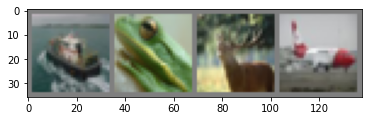

 ship  frog  deer plane


In [130]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [131]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [132]:
# define loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [275]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.646
[1,  4000] loss: 1.659
[1,  6000] loss: 1.633
[1,  8000] loss: 1.653
[1, 10000] loss: 1.643
[1, 12000] loss: 1.640
[2,  2000] loss: 1.657
[2,  4000] loss: 1.631
[2,  6000] loss: 1.644
[2,  8000] loss: 1.650
[2, 10000] loss: 1.649
[2, 12000] loss: 1.642
Finished Training


In [ ]:
# save trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# test accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

### Training on GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)


In [51]:
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [54]:
inputs, labels = data[0].to(device), data[1].to(device)

## Multi-class Classification Using Pytorch

classify corporate bonds by rating using different key financial metrics.

In [273]:
#This is a multiclass classifier.
#Given credit quality feature it will predict which tranche the bond belongs to

In [274]:
#as alot of our features are likely co-linear (only differ by a consant, it is prudent
#to try to figure out which are most valuable using a feature selection technique.
#The choice of algorithm isn't that important as long as it is skillful and consistent
#To keep things simple, we'll use Univariate Selection
#Univariate selection selects features that have the strongest relationship with the output variable
#In this case, we can pretty easily use sckit learn's SelectKBest Implementation

In [211]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler    
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

In [212]:
stock_data = pd.read_csv('grid1.csv')
stock_data

,Ticker,Short Name,EBITDA to Net Sales:Q,GM:Q,Net D/E LF,Total Market Value LF,ROE LF,ROA LF,Curr Liab LF,Net Int Cov,...,CFO T12M,Net Debt to EBITDA LF,Debt/EBITDA LF,ST Brrwng LF,Market Cap,LT Brrwng LF,Net Debt LF,Moody's Issuer Rtg,Fitch Issr ST Rtg,S&P LT LC
0,TXMC US Equity,TIREX CORP,NaN,NaN,NaN,NaN,NaN,45801300.00%,4.98M,NaN,...,-192.63k,NaN,NaN,675.75k,670.05k,NaN,NaN,NaN,NaN,NaN
1,EUBG US Equity,ENTREPRENEUR UNI,NaN,NaN,NaN,1.10M,NaN,1847.86%,182.03k,NaN,...,-45.02k,0.39,0.39,176.88k,170.98k,0,176.41k,NaN,NaN,NaN
2,SPQS US Equity,SPORTSQUEST INC,NaN,NaN,NaN,1.16M,NaN,800.34%,340.00k,NaN,...,-165,0,0,0,1.38k,0,-96,NaN,NaN,NaN
3,SCRH US Equity,SCORES HOLDING C,-120.82%,NaN,NaN,882.56k,NaN,591.33%,325.16k,NaN,...,-449.80k,NaN,NaN,22.08k,330.37k,0,-3.38k,NaN,NaN,NaN
4,SBR US Equity,SABINE ROYALTY,NaN,NaN,-167.83,394.61M,732.52%,488.27%,3.56M,NaN,...,41.57M,NaN,NaN,0,401.66M,0,-8.36M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,MDKM US Equity,MDECHEM INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.11k,NaN,NaN,NaN,NaN,NaN
2996,IHGP US Equity,INTERACT HOLDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.67,NaN,NaN,NaN,NaN,NaN
2997,AVOT US Equity,AMER VIDEO TELEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,MMTS US Equity,MULTI-MEDIA TUTL,-59.34%,86.25%,NaN,2.89M,NaN,NaN,6.97M,NaN,...,NaN,NaN,NaN,2.24M,32.53k,538.02k,2.78M,NaN,NaN,NaN


In [213]:
#rename columns
stock_data = stock_data.rename(columns={"Ticker": "ticker", "Short Name": "full_name", "EBITDA to Net Sales:Q":"ebitda/net_sales", "GM:Q":"gm", "Net D/E LF":"net_debt/e", "Total Market Value LF": "mv", "ROE LF": "roe", "ROA LF": "roa", "Curr Liab LF":"liabilities", "Net Int Cov":"net_interest_coverage", "CFO T12M": "cfo", "Net Debt to EBITDA LF":"net_debt/ebitda", "Debt/EBITDA LF":"debt/ebitda", "ST Brrwng LF":"st_borrowing", "LT Brrwng LF":"lt_borrowing", "Net Debt LF":"net_debt","Moody's Issuer Rtg":"m_rtg", "Fitch Issr ST Rtg":"f_rtg", "S&P LT LC":"sp_rtg", "Market Cap":"mc", "CFO/Debt LF":"cfo/debt"})

In [214]:
stock_data = stock_data.fillna('-1')

In [215]:
#covert T to trillions, B to billions, M to millions, K to thousands. Thanks for truncating Bloomberg! We're using regex expressions here
stock_data['mv'] = stock_data['mv'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['liabilities'] = stock_data['liabilities'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['cfo'] = stock_data['cfo'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['st_borrowing'] = stock_data['st_borrowing'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['lt_borrowing'] = stock_data['lt_borrowing'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['net_debt'] = stock_data['net_debt'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['mc'] = stock_data['mc'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['net_debt/ebitda'] = stock_data['net_debt/ebitda'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)
stock_data['debt/ebitda'] = stock_data['debt/ebitda'].replace({'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', '[tT]': '*1e12'}, regex=True).map(pd.eval).astype(int)

In [216]:
stock_data

,ticker,full_name,ebitda/net_sales,gm,net_debt/e,mv,roe,roa,liabilities,net_interest_coverage,...,cfo,net_debt/ebitda,debt/ebitda,st_borrowing,mc,lt_borrowing,net_debt,m_rtg,f_rtg,sp_rtg
0,TXMC US Equity,TIREX CORP,-1,-1,-1,-1,-1,45801300.00%,4980000,-1,...,-192630,-1,-1,675750,670050,-1,-1,-1,-1,-1
1,EUBG US Equity,ENTREPRENEUR UNI,-1,-1,-1,1100000,-1,1847.86%,182030,-1,...,-45020,0,0,176880,170980,0,176410,-1,-1,-1
2,SPQS US Equity,SPORTSQUEST INC,-1,-1,-1,1160000,-1,800.34%,340000,-1,...,-165,0,0,0,1380,0,-96,-1,-1,-1
3,SCRH US Equity,SCORES HOLDING C,-120.82%,-1,-1,882560,-1,591.33%,325160,-1,...,-449800,-1,-1,22080,330370,0,-3380,-1,-1,-1
4,SBR US Equity,SABINE ROYALTY,-1,-1,-167.83,394610000,732.52%,488.27%,3560000,-1,...,41570000,-1,-1,0,401660000,0,-8359999,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,MDKM US Equity,MDECHEM INC,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,32110,-1,-1,-1,-1,-1
2996,IHGP US Equity,INTERACT HOLDING,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,40,-1,-1,-1,-1,-1
2997,AVOT US Equity,AMER VIDEO TELEC,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2998,MMTS US Equity,MULTI-MEDIA TUTL,-59.34%,86.25%,-1,2890000,-1,-1,6970000,-1,...,-1,-1,-1,2240000,32530,538020,2780000,-1,-1,-1


In [217]:
#convert % to decimal
#first, we use regex to replace '-' with -1* and to remove the % sign
stock_data['ebitda/net_sales'] = stock_data['ebitda/net_sales'].replace({'-':'-1*', '%':''}, regex=True).map(pd.eval).astype(int)
stock_data['roe'] = stock_data['roe'].replace({'-':'-1*', '%':''}, regex=True).map(pd.eval).astype(int)
stock_data['roa'] = stock_data['roa'].replace({'-':'-1*', '%':''}, regex=True).map(pd.eval).astype(int)
stock_data['gm'] = stock_data['gm'].replace({'-':'-1*', '%':''}, regex=True).map(pd.eval).astype(int)

In [218]:
#next, we must divide by 100 to convert the percents to decimal
stock_data['ebitda/net_sales'] = stock_data[stock_data['ebitda/net_sales'] != -1]['ebitda/net_sales'].div(100)
stock_data['roe'] = stock_data[stock_data['roe'] != -1]['roe'].div(100)
stock_data['roa'] = stock_data[stock_data['roa'] != -1]['roa'].div(100)
stock_data['gm'] = stock_data[stock_data['gm'] != -1]['gm'].div(100)

In [219]:
#refill all NaN values with our placeholder, -1
stock_data = stock_data.fillna('-1')

In [220]:
pd.set_option('display.max_rows', 20)

In [221]:
#eliminate any rows that don't have ratings from any agencies (moody's, fitch, nor s&p)
#this is a pretty cheeky way to accomplish this problem using one line - check if all the data isn't the same (the min and the max are not =). If min(x) and max(x) are
#the same, x must be -1
#this works in this case because the ratings system for each agency is different
stock_data = stock_data[stock_data.iloc[:,18:22].apply(lambda x: min(x) != max(x), 1)]

In [222]:
global temp
temp = stock_data

In [223]:
#make a dict of how we'll interpret ratings. For entries
#with multiple entries, we'll take the average
ratings_dict = {'AAA':1, 'AA+':2, 'AA':3, 'AA-':4, 'A+':5, 'A':6, 'A-':7, 'BBB+':8, 'BBB':9, 'BBB-':10, 'BB+':11, 'BB':12, 'BB-':13, 'B+':14, 'B':15, 'B-':16, 'CCC+':17, 'CCC':18, 'CCC-':19, 'CC':20, 'C':21, 'SD':22, 'D':23, 'Aaa':1, 'Aa1':2, 'Aa2':3, 'Aa3':3, 'A1':4, 'A2':5, 'A3':6, 'Baa1':7, 'Baa2':8, 'Baa3':9, 'Ba1':10, 'Ba2':11, 'Ba3':12, 'F1+':3, 'F1':6, 'F2':8, 'F3':10}

In [224]:
#this data is sparse - we need to fill in the empty unknown features. Some typical approaches are regression of the column
#the mean of the column, or stochastic regression of the column. We will try the column mean for all others
#with the same rating for now. We also have to remember to ignore WRs (withdrawn ratings)

#find the average value to replace missing data given a rating and column
def find_class_mean(data):
    col = len(data)
    col_names = list(temp.columns)
    rating = []
    count = 0
    data = np.array(data)
    for i in range(col-3, col):
        if data[i] != '-1' and data[i] != 'WR':
            rating.append(data[i])
            
            if count == 0:
                to_avg_df = temp[temp[col_names[i]] == data[i]] 
                new_rating = ratings_dict[data[i]]
            else:
                to_avg_df.append(temp[temp[col_names[i]] == data[i]])
                new_rating = new_rating + ratings_dict[data[i]]
            
            count = count + 1
    new_rating = new_rating/count
    for i in range(2, col-3):
        if data[i] == '-1' or data[i] == -1:
            calc = to_avg_df[col_names[i]]
            calc = pd.to_numeric(calc)
            men = calc.mean()
            data[i] = men
    
    data = np.append(data, new_rating)
    
    if (new_rating <= 10):
        data = np.append(data, 1)
    else:
        data = np.append(data, 0)

    return data

In [225]:
#apply our empty data averager to the entire dataframe
col_names = list(stock_data.columns)
new_data = stock_data.apply(find_class_mean, axis=1)

In [226]:
#make the returned data into a numpy matrix
new_data = np.vstack(new_data)
col_names = np.append(col_names, 'label')
col_names = np.append(col_names, 'i/g')

In [227]:
#reconstruct the dataframe
data = pd.DataFrame(new_data, columns = col_names)

In [228]:
data

,ticker,full_name,ebitda/net_sales,gm,net_debt/e,mv,roe,roa,liabilities,net_interest_coverage,...,debt/ebitda,st_borrowing,mc,lt_borrowing,net_debt,m_rtg,f_rtg,sp_rtg,label,i/g
0,ASCS US Equity,AMERICAN CR-PREF,0.08,-0.04,59.14,8.45358e+10,2.47,0.85,351400000,50.4,...,0,118800000,2.60923e+10,128060000,246730000,-1,-1,BBB+,8,1
1,IHRT US Equity,IHEARTMEDIA-CL A,-2.09,0.61,490.1,7370000000,-0.316889,0.82,645840000,43.69,...,19.4333,112590000,1040000000,6710000000,6170000000,-1,-1,B,15,0
2,WFTLF US Equity,WEATHERFORD INTE,-0.52,0.24,98.93,2560000000,-0.670909,0.49,1640000000,11.1,...,4.27273,116000000,140030000,2400000000,1840000000,-1,-1,CCC,18,0
3,GBL US Equity,GAMCO INVESTO-A,0.37,-0.177857,-82.08,328670000,1.58,0.48,2.62101e+09,3.73664,...,0,0,347510000,24200000,-53640000,-1,-1,BBB-,10,1
4,EAF US Equity,GRAFTECH INTERNA,0.55,0.56,213.171,4010000000,-0.0308772,0.43,222540000,7.87,...,1,138000,1720000000,1810000000,1660000000,-1,-1,BB-,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NNHE US Equity,NEENAH ENTERPRIS,-0.769211,0.138158,624.248,2.31264e+09,-0.708421,-0.171579,4.32593e+08,-0.300263,...,9.63158,1.4386e+08,6.05584e+08,1.57946e+09,1.62882e+09,-1,-1,CCC+,17,0
1290,AMK US Equity,ASSETMARK FINANC,0.1,0.0904808,9.27,1800000000,0.0194231,-0.0101923,3.70428e+09,3.55029,...,3.67308,2910000,1930000000,158380000,81120000,-1,-1,BB+,11,0
1291,OCESO US Equity,OCEAN SPRAY CRAN,-0.0928571,-0.177857,99.9571,2.14083e+10,0.0287143,-0.0105714,2.62101e+09,3.73664,...,4.22857,1.09516e+09,1.08925e+10,5.24545e+09,5.04906e+09,-1,-1,BBB-,10,1
1292,VKSC US Equity,VISKASE COS I,0.15,0.2,723.67,453970000,-0.670909,-0.18,351670000,0.520909,...,4.27273,269150000,54140000,31950000,288240000,-1,-1,CCC,18,0


In [229]:
#construct a dictionary of all of the credit tranches so we can give our companies a single label
#right now, there are 3, moody's, fitch, and S&P
m_rtg = np.unique(data['m_rtg'])
f_rtg = np.unique(data['f_rtg'])
sp_rtg = np.unique(data['sp_rtg'])

In [230]:
f_rtg

array(['-1', 'B', 'F1', 'F1+', 'F2', 'F3'], dtype=object)

In [231]:
#This is a multiclass classifier.
#Given credit quality feature it will predict which tranche the bond belongs to

In [232]:
#as alot of our features are likely co-linear (only differ by a consant, it is prudent
#to try to figure out which are most valuable using a feature selection technique.
#The choice of algorithm isn't that important as long as it is skillful and consistent
#To keep things simple, we'll use Univariate Selection
#Univariate selection selects features that have the strongest relationship with the output variable
#In this case, we can pretty easily use sckit learn's SelectKBest Implementation

In [233]:
m_data = data.drop(['m_rtg', 'f_rtg', 'label', 'i/g'], axis=1)

In [234]:
m_data = m_data[m_data['sp_rtg'] != '-1']

In [235]:
#find top 4 features
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(m_data.iloc[:,2:-1],m_data.iloc[:,-1])
scores = pd.DataFrame(fit.scores_, index=m_data.iloc[:,2:-1].columns)
features = fit.transform(m_data.iloc[:,2:-1])

In [236]:
scores

,0
ebitda/net_sales,4.265572
gm,5.493388
net_debt/e,1.784069
mv,11.548956
roe,19.380237
roa,11.798887
liabilities,25.030727
net_interest_coverage,27.692001
cfo/debt,4.175923
cfo,24.725785


In [237]:
multi_data = m_data.drop(['ebitda/net_sales', 'gm', 'net_debt/e', 'mv', 'roa', 'cfo/debt', 'debt/ebitda', 'net_debt/e', 'st_borrowing', 'lt_borrowing'], axis=1)

In [238]:
# get a one-hot-encoded representation of s&p ratings
sp_labels = pd.get_dummies(multi_data['sp_rtg'])
sp_labels.columns

Index(['A', 'A+', 'A-', 'AA', 'AA+', 'AA-', 'AAA', 'B', 'B+', 'B-', 'BB',
       'BB+', 'BB-', 'BBB', 'BBB+', 'BBB-', 'CC', 'CCC', 'CCC+', 'CCC-', 'D',
       'SD'],
      dtype='object')

In [239]:
class2idx = {
    'A+':0,
    'A':1,
    'A-':2,
    'AA+':3,
    'AA':4,
    'AA-':5,
    'AAA':6,
    'B+':7,
    'B':8,
    'B-':9,
    'BB+':10,
    'BB':11,
    'BB-':12,
    'BBB+':21,
    'BBB':13,
    'BBB-':14,
    'CC':15,
    'CCC+':16,
    'CCC':17,
    'CCC-':18,
    'D':19,
    'SD':20
}
idx2class = {v: k for k, v in class2idx.items()}
multi_data['sp_rtg'].replace(class2idx, inplace=True)

In [240]:
sp_labels=multi_data['sp_rtg']

In [241]:
multi_data = multi_data.drop(['sp_rtg'], axis=1)

In [242]:
random_state = 101
valtrain, test, valtrain_target, test_target = train_test_split(multi_data.iloc[:,2:-1], sp_labels, test_size=0.2, random_state=random_state)

In [243]:
# train validation split
train, val, train_target, val_target = train_test_split(valtrain, valtrain_target, test_size=0.1, random_state=21)

In [244]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_val = scaler.transform(val)
X_test = scaler.transform(test)

X_train, y_train = np.array(X_train), np.array(train_target)
X_val, y_val = np.array(X_val), np.array(val_target)
X_test, y_test = np.array(X_test), np.array(test_target)

In [245]:
train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [249]:
X_train

array([[0.45419355, 0.05323229, 0.09753266, 0.        , 0.00749048,
        0.50886618],
       [0.48387097, 0.10964568, 0.1291713 , 0.19010538, 0.00719424,
        0.11361844],
       [0.44774194, 0.02276429, 0.0443927 , 0.1632006 , 0.00946953,
        0.00569294],
       ...,
       [0.46451613, 0.00855832, 0.04632817, 0.16197892, 0.00935252,
        0.04265117],
       [0.4516129 , 0.01642036, 0.04523251, 0.16217593, 0.01151079,
        0.02887583],
       [0.43472552, 0.00164138, 0.0360962 , 0.15946097, 0.00791367,
        0.00690621]])

In [169]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [251]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = 6
NUM_CLASSES = 22

In [252]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [253]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [268]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

cpu


In [269]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to("cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)


MulticlassClassification(
  (layer_1): Linear(in_features=6, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=22, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [270]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [271]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


Epoch 001: | Train Loss: 2.82912 | Val Loss: 2.76623 | Train Acc: 0.000| Val Acc: 17.476
Epoch 002: | Train Loss: 2.46043 | Val Loss: 2.56159 | Train Acc: 0.000| Val Acc: 23.301
Epoch 003: | Train Loss: 2.31455 | Val Loss: 2.59085 | Train Acc: 1.724| Val Acc: 18.447
Epoch 004: | Train Loss: 2.23126 | Val Loss: 2.53041 | Train Acc: 0.000| Val Acc: 23.301
Epoch 005: | Train Loss: 2.16660 | Val Loss: 2.51496 | Train Acc: 0.000| Val Acc: 14.563
Epoch 006: | Train Loss: 2.11427 | Val Loss: 2.55956 | Train Acc: 0.000| Val Acc: 15.534
Epoch 007: | Train Loss: 2.08281 | Val Loss: 2.56854 | Train Acc: 1.724| Val Acc: 16.505
Epoch 008: | Train Loss: 2.05644 | Val Loss: 2.58516 | Train Acc: 1.724| Val Acc: 14.563
Epoch 009: | Train Loss: 2.02630 | Val Loss: 2.67269 | Train Acc: 0.000| Val Acc: 15.534
Epoch 010: | Train Loss: 1.97982 | Val Loss: 2.76308 | Train Acc: 1.724| Val Acc: 15.534
Epoch 011: | Train Loss: 1.95438 | Val Loss: 2.92662 | Train Acc: 5.172| Val Acc: 13.592
Epoch 012: | Train Lo

KeyboardInterrupt: 